In [1]:
import tensorflow as tf

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "drive/MyDrive/wasteseg"

classes = os.listdir(dir_example)
print(classes)

['test', 'train', 'visualize']


In [4]:
dir_example = "drive/MyDrive/wasteseg/train"

train_classes = os.listdir(dir_example)
print(train_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


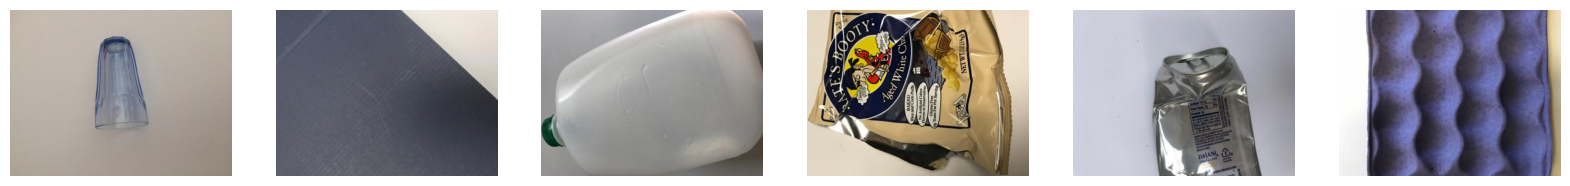

In [5]:
dir_with_examples = 'drive/MyDrive/wasteseg/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train = 'drive/MyDrive/wasteseg/train'
test = 'drive/MyDrive/wasteseg/test'

In [8]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2185 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [9]:

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [10]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [11]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [12]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0

In [14]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

<ipython-input-14-fcc35ea22705>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
68/68 [==============================] - 1201s 18s/step - loss: 1.7508 - accuracy: 0.2160
Epoch 2/10
68/68 [==============================] - 394s 6s/step - loss: 1.6007 - accuracy: 0.3377
Epoch 3/10
68/68 [==============================] - 398s 6s/step - loss: 1.3963 - accuracy: 0.4417
Epoch 4/10
68/68 [==============================] - 393s 6s/step - loss: 1.2939 - accuracy: 0.4933
Epoch 5/10
68/68 [==============================] - 385s 6s/step - loss: 1.2485 - accuracy: 0.5211
Epoch 6/10
68/68 [==============================] - 391s 6s/step - loss: 1.1288 - accuracy: 0.5625
Epoch 7/10
68/68 [==============================] - 384s 6s/step - loss: 1.0118 - accuracy: 0.6261
Epoch 8/10
68/68 [==============================] - 376s 6s/step - loss: 0.9202 - accuracy: 0.6656
Epoch 9/10
68/68 [==============================] - 368s 5s/step - loss: 0.8107 - accuracy: 0.7111
Epoch 10/10
68/68 [==============================] - 367s 5s/step - loss: 0.6978 - accuracy: 0.7497


In [15]:
import keras.utils as ku
import numpy as np

1/1 [==============================] - 0s 101ms/step
Probability: 0.9970516
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

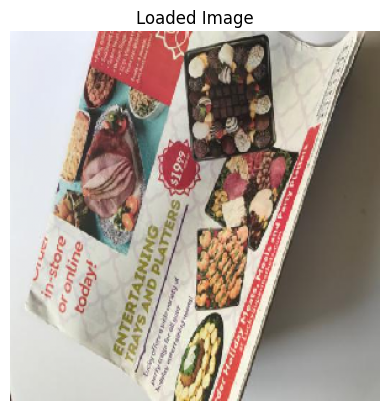

In [18]:
test_img = 'drive/MyDrive/wasteseg/test/paper/paper_521.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [19]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.03 %
GLASS : 0.0 %
METAL : 0.26 %
PAPER : 99.71 %
PLASTIC : 0.0 %
TRASH : 0.0 %


1/1 [==============================] - 0s 55ms/step
Probability: 0.94999564
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

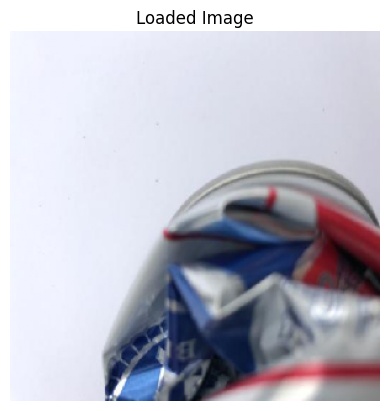

In [20]:
test_img = 'drive/MyDrive/wasteseg/test/metal/metal_386.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [21]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.15 %
GLASS : 0.65 %
METAL : 95.0 %
PAPER : 0.32 %
PLASTIC : 3.87 %
TRASH : 0.01 %
